In [1]:
import os
import pandas as pd
import numpy as np

In [4]:
dates=['2014-02-16','2014-02-17','2014-02-18','2014-02-19']
algs=['Model-A','Model-B','Model-C']
filename=os.path.join('data','exa,ple.csv')
with open(filename,'w') as outfile:
    outfile.write('date,type,value\n')
    for d in dates:
        for a in algs:
            v=np.random.randint(10,size=1)[0]
            tmp='{0},{1},{2}\n'.format(d,a,v)
            outfile.write(tmp)

In [5]:
with open(filename,'r') as infile:
    print(infile.read())

date,type,value
2014-02-16,Model-A,9
2014-02-16,Model-B,7
2014-02-16,Model-C,3
2014-02-17,Model-A,5
2014-02-17,Model-B,7
2014-02-17,Model-C,2
2014-02-18,Model-A,5
2014-02-18,Model-B,5
2014-02-18,Model-C,9
2014-02-19,Model-A,6
2014-02-19,Model-B,9
2014-02-19,Model-C,8



In [6]:
filename

'data\\exa,ple.csv'

In [7]:
df=pd.read_csv(filename)
print(df)

          date     type  value
0   2014-02-16  Model-A      9
1   2014-02-16  Model-B      7
2   2014-02-16  Model-C      3
3   2014-02-17  Model-A      5
4   2014-02-17  Model-B      7
5   2014-02-17  Model-C      2
6   2014-02-18  Model-A      5
7   2014-02-18  Model-B      5
8   2014-02-18  Model-C      9
9   2014-02-19  Model-A      6
10  2014-02-19  Model-B      9
11  2014-02-19  Model-C      8


In [8]:
results=df.pivot('date','type','value')
print(results)

type        Model-A  Model-B  Model-C
date                                 
2014-02-16        9        7        3
2014-02-17        5        7        2
2014-02-18        5        5        9
2014-02-19        6        9        8


In [9]:
results.columns

Index(['Model-A', 'Model-B', 'Model-C'], dtype='object', name='type')

In [10]:
results.index

Index(['2014-02-16', '2014-02-17', '2014-02-18', '2014-02-19'], dtype='object', name='date')

In [11]:
results['Model-A']

date
2014-02-16    9
2014-02-17    5
2014-02-18    5
2014-02-19    6
Name: Model-A, dtype: int64

In [12]:
results['Model-A'].values

array([9, 5, 5, 6], dtype=int64)

In [13]:
results.iloc[0]

type
Model-A    9
Model-B    7
Model-C    3
Name: 2014-02-16, dtype: int64

In [14]:
print(results.iloc[2:4,1:])

type        Model-B  Model-C
date                        
2014-02-18        5        9
2014-02-19        9        8


In [16]:
results.mean(axis=1)

date
2014-02-16    6.333333
2014-02-17    4.666667
2014-02-18    6.333333
2014-02-19    7.666667
dtype: float64

In [17]:
results.count(axis=0)

type
Model-A    4
Model-B    4
Model-C    4
dtype: int64

In [18]:
df=pd.read_csv(filename)
tmp={'date':['2014-02-16','2014-02-18'],'type':['Model-D','Model-D'],'value':[11,7]}
pd.DataFrame(tmp)

date     type  value
0  2014-02-16  Model-D     11
1  2014-02-18  Model-D      7

In [19]:
df=pd.concat([df,pd.DataFrame(tmp)],ignore_index=True)
df.shape

(14, 3)

In [20]:
df.drop(2,axis=0).head()

date     type  value
0  2014-02-16  Model-A      9
1  2014-02-16  Model-B      7
3  2014-02-17  Model-A      5
4  2014-02-17  Model-B      7
5  2014-02-17  Model-C      2

In [21]:
df.drop('type',axis=1).head()

date  value
0  2014-02-16      9
1  2014-02-16      7
2  2014-02-16      3
3  2014-02-17      5
4  2014-02-17      7

In [22]:
results=df.pivot('date','type','value')
print(results)

type        Model-A  Model-B  Model-C  Model-D
date                                          
2014-02-16      9.0      7.0      3.0     11.0
2014-02-17      5.0      7.0      2.0      NaN
2014-02-18      5.0      5.0      9.0      7.0
2014-02-19      6.0      9.0      8.0      NaN


In [23]:
results.mean(axis=1)

date
2014-02-16    7.500000
2014-02-17    4.666667
2014-02-18    6.500000
2014-02-19    7.666667
dtype: float64

In [24]:
results.count(axis=0)

type
Model-A    4
Model-B    4
Model-C    4
Model-D    2
dtype: int64

In [25]:
results.count(axis=1)

date
2014-02-16    4
2014-02-17    3
2014-02-18    4
2014-02-19    3
dtype: int64

In [26]:
print(results.isnull())

type        Model-A  Model-B  Model-C  Model-D
date                                          
2014-02-16    False    False    False    False
2014-02-17    False    False    False     True
2014-02-18    False    False    False    False
2014-02-19    False    False    False     True


In [27]:
print(results.fillna(0))

type        Model-A  Model-B  Model-C  Model-D
date                                          
2014-02-16      9.0      7.0      3.0     11.0
2014-02-17      5.0      7.0      2.0      0.0
2014-02-18      5.0      5.0      9.0      7.0
2014-02-19      6.0      9.0      8.0      0.0


In [28]:
print(results)

type        Model-A  Model-B  Model-C  Model-D
date                                          
2014-02-16      9.0      7.0      3.0     11.0
2014-02-17      5.0      7.0      2.0      NaN
2014-02-18      5.0      5.0      9.0      7.0
2014-02-19      6.0      9.0      8.0      NaN


In [30]:
tmp=results.copy()

In [31]:
tmp.fillna(0,inplace=True)
print(tmp)

type        Model-A  Model-B  Model-C  Model-D
date                                          
2014-02-16      9.0      7.0      3.0     11.0
2014-02-17      5.0      7.0      2.0      0.0
2014-02-18      5.0      5.0      9.0      7.0
2014-02-19      6.0      9.0      8.0      0.0


In [33]:
tmp.reset_index(inplace=True)
tmp.columns

Index(['date', 'Model-A', 'Model-B', 'Model-C', 'Model-D'], dtype='object', name='type')

In [34]:
print(tmp)

type        date  Model-A  Model-B  Model-C  Model-D
0     2014-02-16      9.0      7.0      3.0     11.0
1     2014-02-17      5.0      7.0      2.0      0.0
2     2014-02-18      5.0      5.0      9.0      7.0
3     2014-02-19      6.0      9.0      8.0      0.0


In [35]:
results=df.pivot('date','type','value')
print(results)

type        Model-A  Model-B  Model-C  Model-D
date                                          
2014-02-16      9.0      7.0      3.0     11.0
2014-02-17      5.0      7.0      2.0      NaN
2014-02-18      5.0      5.0      9.0      7.0
2014-02-19      6.0      9.0      8.0      NaN


In [38]:
results.reset_index(inplace=True)
print(results)

type        date  Model-A  Model-B  Model-C  Model-D
0     2014-02-16      9.0      7.0      3.0     11.0
1     2014-02-17      5.0      7.0      2.0      NaN
2     2014-02-18      5.0      5.0      9.0      7.0
3     2014-02-19      6.0      9.0      8.0      NaN


In [39]:
back=pd.melt(results, id_vars=['date'])
print(back)

          date     type  value
0   2014-02-16  Model-A    9.0
1   2014-02-17  Model-A    5.0
2   2014-02-18  Model-A    5.0
3   2014-02-19  Model-A    6.0
4   2014-02-16  Model-B    7.0
5   2014-02-17  Model-B    7.0
6   2014-02-18  Model-B    5.0
7   2014-02-19  Model-B    9.0
8   2014-02-16  Model-C    3.0
9   2014-02-17  Model-C    2.0
10  2014-02-18  Model-C    9.0
11  2014-02-19  Model-C    8.0
12  2014-02-16  Model-D   11.0
13  2014-02-17  Model-D    NaN
14  2014-02-18  Model-D    7.0
15  2014-02-19  Model-D    NaN


In [40]:
back.dropna(axis=0)

date     type  value
0   2014-02-16  Model-A    9.0
1   2014-02-17  Model-A    5.0
2   2014-02-18  Model-A    5.0
3   2014-02-19  Model-A    6.0
4   2014-02-16  Model-B    7.0
5   2014-02-17  Model-B    7.0
6   2014-02-18  Model-B    5.0
7   2014-02-19  Model-B    9.0
8   2014-02-16  Model-C    3.0
9   2014-02-17  Model-C    2.0
10  2014-02-18  Model-C    9.0
11  2014-02-19  Model-C    8.0
12  2014-02-16  Model-D   11.0
14  2014-02-18  Model-D    7.0

In [41]:
back.dropna(axis=1).head()

date     type
0  2014-02-16  Model-A
1  2014-02-17  Model-A
2  2014-02-18  Model-A
3  2014-02-19  Model-A
4  2014-02-16  Model-B

In [42]:
back.dropna(axis=0,inplace=True)

In [43]:
back.to_csv('data/back.csv',index=False)

In [44]:
print(open('data/back.csv').read())

date,type,value
2014-02-16,Model-A,9.0
2014-02-17,Model-A,5.0
2014-02-18,Model-A,5.0
2014-02-19,Model-A,6.0
2014-02-16,Model-B,7.0
2014-02-17,Model-B,7.0
2014-02-18,Model-B,5.0
2014-02-19,Model-B,9.0
2014-02-16,Model-C,3.0
2014-02-17,Model-C,2.0
2014-02-18,Model-C,9.0
2014-02-19,Model-C,8.0
2014-02-16,Model-D,11.0
2014-02-18,Model-D,7.0



In [45]:
unames=['user_id','gender','age','occupation','zip']
users=pd.read_table('users.dat',sep='::',header=None,names=unames,engine='python')
rnames=['user_id','movie_id','rating','timestamp']
ratings=pd.read_table('ratings.dat',sep='::',header=None,names=rnames,engine='python')
mnames=['movie_id','title','genres']
movies=pd.read_table('movies.dat',sep="::",header=None,names=mnames,engine='python')

In [46]:
users.head()

user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455

In [47]:
ratings.head()

user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [48]:
movies.head()

movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy

In [49]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [50]:
data=pd.merge(pd.merge(ratings,users),movies)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
user_id       1000209 non-null int64
movie_id      1000209 non-null int64
rating        1000209 non-null int64
timestamp     1000209 non-null int64
gender        1000209 non-null object
age           1000209 non-null int64
occupation    1000209 non-null int64
zip           1000209 non-null object
title         1000209 non-null object
genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [52]:
data.head()

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0        1      1193       5  978300760      F    1          10  48067   
1        2      1193       5  978298413      M   56          16  70072   
2       12      1193       4  978220179      M   25          12  32793   
3       15      1193       4  978199279      M   25           7  22903   
4       17      1193       5  978158471      M   50           1  95350   

                                    title genres  
0  One Flew Over the Cuckoo's Nest (1975)  Drama  
1  One Flew Over the Cuckoo's Nest (1975)  Drama  
2  One Flew Over the Cuckoo's Nest (1975)  Drama  
3  One Flew Over the Cuckoo's Nest (1975)  Drama  
4  One Flew Over the Cuckoo's Nest (1975)  Drama

In [53]:
data.sort_values(by='rating',ascending=False).head()

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0             1      1193       5  978300760      F    1          10  48067   
233796     5374      2770       5  962391108      M   35           7  38018   
233813     5483      2770       5  959888512      F   25           6  15202   
669852     1812      3635       5  974706848      F   25          12  48103   
669856     1871      3635       5  974694190      F   45           1  46774   

                                         title  genres  
0       One Flew Over the Cuckoo's Nest (1975)   Drama  
233796                        Bowfinger (1999)  Comedy  
233813                        Bowfinger (1999)  Comedy  
669852            Spy Who Loved Me, The (1977)  Action  
669856            Spy Who Loved Me, The (1977)  Action

In [56]:
data.sort_values(by='rating',ascending=False).head()

user_id  movie_id  rating  timestamp gender  age  occupation    zip  \
0             1      1193       5  978300760      F    1          10  48067   
233796     5374      2770       5  962391108      M   35           7  38018   
233813     5483      2770       5  959888512      F   25           6  15202   
669852     1812      3635       5  974706848      F   25          12  48103   
669856     1871      3635       5  974694190      F   45           1  46774   

                                         title  genres  
0       One Flew Over the Cuckoo's Nest (1975)   Drama  
233796                        Bowfinger (1999)  Comedy  
233813                        Bowfinger (1999)  Comedy  
669852            Spy Who Loved Me, The (1977)  Action  
669856            Spy Who Loved Me, The (1977)  Action

In [55]:
data[['title','rating']].sort_values(by='rating',ascending=False).head()

title  rating
0       One Flew Over the Cuckoo's Nest (1975)       5
233796                        Bowfinger (1999)       5
233813                        Bowfinger (1999)       5
669852            Spy Who Loved Me, The (1977)       5
669856            Spy Who Loved Me, The (1977)       5

In [57]:
grp=data[['title','rating']].groupby('title')

In [58]:
type(grp)

pandas.core.groupby.groupby.DataFrameGroupBy

In [59]:
mean_rating=grp.mean()

In [60]:
mean_rating.head()

rating
title                                  
$1,000,000 Duck (1971)         3.027027
'Night Mother (1986)           3.371429
'Til There Was You (1997)      2.692308
'burbs, The (1989)             2.910891
...And Justice for All (1979)  3.713568

In [62]:
mean_rating.sort_values('rating',ascending=False).head(10)

rating
title                                            
Ulysses (Ulisse) (1954)                       5.0
Lured (1947)                                  5.0
Follow the Bitch (1998)                       5.0
Bittersweet Motel (2000)                      5.0
Song of Freedom (1936)                        5.0
One Little Indian (1973)                      5.0
Smashing Time (1967)                          5.0
Schlafes Bruder (Brother of Sleep) (1995)     5.0
Gate of Heavenly Peace, The (1995)            5.0
Baby, The (1973)                              5.0

In [63]:
mean_rating=grp['rating'].agg(['mean','count'])

In [64]:
mean_rating.sort_values(['mean','count'],ascending=False).head(10)

mean  count
title                                                 
Gate of Heavenly Peace, The (1995)          5.0      3
Smashing Time (1967)                        5.0      2
Baby, The (1973)                            5.0      1
Bittersweet Motel (2000)                    5.0      1
Follow the Bitch (1998)                     5.0      1
Lured (1947)                                5.0      1
One Little Indian (1973)                    5.0      1
Schlafes Bruder (Brother of Sleep) (1995)   5.0      1
Song of Freedom (1936)                      5.0      1
Ulysses (Ulisse) (1954)                     5.0      1

In [65]:
mask=mean_rating['count']>1000
type(mask)

pandas.core.series.Series

In [66]:
sum(mask)

207

In [67]:
mask.head()

title
$1,000,000 Duck (1971)           False
'Night Mother (1986)             False
'Til There Was You (1997)        False
'burbs, The (1989)               False
...And Justice for All (1979)    False
Name: count, dtype: bool

In [68]:
mean_rating.loc[mask].head()

mean  count
title                                        
2001: A Space Odyssey (1968)  4.068765   1716
Abyss, The (1989)             3.683965   1715
African Queen, The (1951)     4.251656   1057
Air Force One (1997)          3.588290   1076
Airplane! (1980)              3.971115   1731

In [69]:
mean_rating.loc[mask]['count'].min()

1001

In [70]:
mean_rating.loc[mask]['count'].max()

3428

In [71]:
mean_rating.loc[mask].sort_values('mean', ascending=False).head(10)

mean  count
title                                                              
Shawshank Redemption, The (1994)                    4.554558   2227
Godfather, The (1972)                               4.524966   2223
Usual Suspects, The (1995)                          4.517106   1783
Schindler's List (1993)                             4.510417   2304
Raiders of the Lost Ark (1981)                      4.477725   2514
Rear Window (1954)                                  4.476190   1050
Star Wars: Episode IV - A New Hope (1977)           4.453694   2991
Dr. Strangelove or: How I Learned to Stop Worry...  4.449890   1367
Casablanca (1942)                                   4.412822   1669
Sixth Sense, The (1999)                             4.406263   2459

In [72]:
mean_ratings=pd.pivot_table(data,'rating',index='title',columns='gender',aggfunc='mean')
mean_ratings.head()

gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [73]:
mean_ratings.sort_values('M', ascending=False).head(10)

gender                                            F    M
title                                                   
Schlafes Bruder (Brother of Sleep) (1995)       NaN  5.0
Small Wonders (1996)                       3.333333  5.0
Gate of Heavenly Peace, The (1995)         5.000000  5.0
Baby, The (1973)                                NaN  5.0
Ulysses (Ulisse) (1954)                         NaN  5.0
Dangerous Game (1993)                      4.000000  5.0
Angela (1995)                              3.000000  5.0
Bells, The (1926)                          4.000000  5.0
Smashing Time (1967)                            NaN  5.0
Follow the Bitch (1998)                         NaN  5.0

In [74]:
mean_ratings.sort_values('F', ascending=False).head(10)

gender                                               F         M
title                                                           
Clean Slate (Coup de Torchon) (1981)               5.0  3.857143
Ballad of Narayama, The (Narayama Bushiko) (1958)  5.0  3.428571
Raw Deal (1948)                                    5.0  3.307692
Bittersweet Motel (2000)                           5.0       NaN
Skipped Parts (2000)                               5.0  4.000000
Lamerica (1994)                                    5.0  4.666667
Gambler, The (A Játékos) (1997)                    5.0  3.166667
Brother, Can You Spare a Dime? (1975)              5.0  3.642857
Ayn Rand: A Sense of Life (1997)                   5.0  4.000000
24 7: Twenty Four Seven (1997)                     5.0  3.750000

In [75]:
mean_ratings['diff']=abs(mean_ratings['M']-mean_ratings['F'])

In [76]:
mean_ratings.sort_values('diff',ascending=False).head(10)

gender                                                     F         M  \
title                                                                    
Tigrero: A Film That Was Never Made (1994)          1.000000  4.333333   
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  4.000000  1.000000   
Neon Bible, The (1995)                              1.000000  4.000000   
James Dean Story, The (1957)                        4.000000  1.000000   
Country Life (1994)                                 5.000000  2.000000   
Enfer, L' (1994)                                    1.000000  3.750000   
Babyfever (1994)                                    3.666667  1.000000   
Stalingrad (1993)                                   1.000000  3.593750   
Woman of Paris, A (1923)                            5.000000  2.428571   
Cobra (1925)                                        4.000000  1.500000   

gender                                                  diff  
title                                                         
Tigrero: A Film That Was Never Made (1994)          3.333333  
Spiders, The (Die Spinnen, 1. Teil: Der Goldene...  3.000000  
Neon Bible, The (1995)                              3.000000  
James Dean Story, The (1957)                        3.000000  
Country Life (1994)                                 3.000000  
Enfer, L' (1994)                                    2.750000  
Babyfever (1994)                                    2.666667  
Stalingrad (1993)                                   2.593750  
Woman of Paris, A (1923)                            2.571429  
Cobra (1925)                                        2.500000

In [77]:
mean_ratings.sort_values('diff',ascending=True).head(10)

gender                                                    F         M  diff
title                                                                      
Nelly & Monsieur Arnaud (1995)                     3.600000  3.600000   0.0
Last Dance (1996)                                  3.000000  3.000000   0.0
Red Dwarf, The (Le Nain rouge) (1998)              3.000000  3.000000   0.0
Regret to Inform (1998)                            4.000000  4.000000   0.0
Midaq Alley (Callejón de los milagros, El) (1995)  4.000000  4.000000   0.0
Very Thought of You, The (1998)                    3.555556  3.555556   0.0
Sonic Outlaws (1995)                               4.000000  4.000000   0.0
Hideous Sun Demon, The (1959)                      2.000000  2.000000   0.0
Walk in the Sun, A (1945)                          4.000000  4.000000   0.0
Cotton Mary (1999)                                 3.000000  3.000000   0.0

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

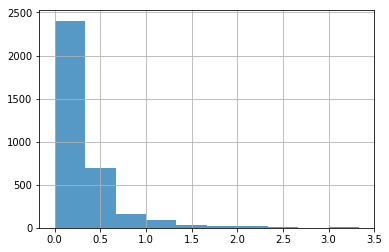

In [80]:
mean_ratings['diff'].hist(alpha=0.75);

In [81]:
diff_mask=mean_ratings['diff']<0.05
m_mask=mean_ratings['M']>4.25
f_mask=mean_ratings['F']>4.25

In [82]:
mask=diff_mask & m_mask & f_mask

In [83]:
date_night=mean_ratings[mask]

In [85]:
date_night.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Celebration, The (Festen) (1998) to Yojimbo (1961)
Data columns (total 3 columns):
F       16 non-null float64
M       16 non-null float64
diff    16 non-null float64
dtypes: float64(3)
memory usage: 512.0+ bytes


In [86]:
date_night

gender                                     F         M      diff
title                                                           
Celebration, The (Festen) (1998)    4.307692  4.307692  0.000000
Cinema Paradiso (1988)              4.317536  4.272277  0.045258
Gate of Heavenly Peace, The (1995)  5.000000  5.000000  0.000000
Henry V (1989)                      4.252427  4.297214  0.044786
It's a Wonderful Life (1946)        4.310000  4.294896  0.015104
Jean de Florette (1986)             4.308642  4.333333  0.024691
M (1931)                            4.316667  4.298387  0.018280
Manchurian Candidate, The (1962)    4.358824  4.326050  0.032773
North by Northwest (1959)           4.364458  4.390641  0.026183
Rear Window (1954)                  4.484536  4.472991  0.011545
Shawshank Redemption, The (1994)    4.539075  4.560625  0.021550
Third Man, The (1949)               4.466019  4.448276  0.017744
To Live (Huozhe) (1994)             4.375000  4.333333  0.041667
Usual Suspects, The (1995)          4.513317  4.518248  0.004931
Vertigo (1958)                      4.277778  4.271237  0.006541
Yojimbo (1961)                      4.423077  4.402116  0.020961

In [87]:
date_night['mean']=date_night['M']+date_night['F']

C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
date_night.sort_values('mean',ascending=False)

gender                                     F         M      diff       mean
title                                                                      
Gate of Heavenly Peace, The (1995)  5.000000  5.000000  0.000000  10.000000
Shawshank Redemption, The (1994)    4.539075  4.560625  0.021550   9.099700
Usual Suspects, The (1995)          4.513317  4.518248  0.004931   9.031565
Rear Window (1954)                  4.484536  4.472991  0.011545   8.957527
Third Man, The (1949)               4.466019  4.448276  0.017744   8.914295
Yojimbo (1961)                      4.423077  4.402116  0.020961   8.825193
North by Northwest (1959)           4.364458  4.390641  0.026183   8.755099
To Live (Huozhe) (1994)             4.375000  4.333333  0.041667   8.708333
Manchurian Candidate, The (1962)    4.358824  4.326050  0.032773   8.684874
Jean de Florette (1986)             4.308642  4.333333  0.024691   8.641975
Celebration, The (Festen) (1998)    4.307692  4.307692  0.000000   8.615385
M (1931)                            4.316667  4.298387  0.018280   8.615054
It's a Wonderful Life (1946)        4.310000  4.294896  0.015104   8.604896
Cinema Paradiso (1988)              4.317536  4.272277  0.045258   8.589813
Henry V (1989)                      4.252427  4.297214  0.044786   8.549641
Vertigo (1958)                      4.277778  4.271237  0.006541   8.549015